In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,MaxPooling2D,Dense,Conv2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [45]:
train_dir = (r"C:\Users\HP\Downloads\Road Signs classification dataset\Road Signs classification dataset\DATA")
test_dir = (r"C:\Users\HP\Downloads\Road Signs classification dataset\Road Signs classification dataset\TEST")

In [46]:
train_datagen = ImageDataGenerator(
    rescale=1./255,rotation_range=20,zoom_range=0.2,horizontal_flip=True
)

In [47]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [48]:
# Load images in batches
train_gen = train_datagen.flow_from_directory(
    train_dir,target_size=(224,224),batch_size=32,class_mode="categorical"
)

Found 743 images belonging to 30 classes.


In [49]:
test_gen = test_datagen.flow_from_directory(
    test_dir,target_size=(224,224),batch_size=32,class_mode="categorical"
)

Found 280 images belonging to 30 classes.


In [53]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D((2,2)))

C:\Users\HP\Documents\conda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))

In [56]:
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))

In [57]:
model.add(Flatten())

In [58]:
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))

In [59]:
model.add(Dense(30,activation="softmax"))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 30)                  │           3,870 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,172,830 (42.62 MB)

 Trainable params: 11,172,830 (42.62 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [61]:
history = model.fit(train_gen,validation_data=test_gen,epochs=10)

C:\Users\HP\Documents\conda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.0415 - loss: 3.5827 - val_accuracy: 0.0321 - val_loss: 3.4228
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.0607 - loss: 3.3372 - val_accuracy: 0.0607 - val_loss: 3.4992
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.1326 - loss: 3.1415 - val_accuracy: 0.0679 - val_loss: 3.3454
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.2358 - loss: 2.6828 - val_accuracy: 0.2571 - val_loss: 2.8557
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.3125 - loss: 2.3832 - val_accuracy: 0.2214 - val_loss: 2.7584
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.3504 - loss: 2.1460 - val_accuracy: 0.3750 - val_loss: 2.3467
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.4395 - loss: 1.8437 - val_accuracy: 0.4179 - val_loss: 2.5011
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.5406 - loss: 1.5293 - val_accuracy: 0.4750 - val_loss:

In [64]:
# y_pred_prb = model.predict(test_dir)
# y_pred = np.argmax(y_pred_prb,axis=1)


# Predict probabilities from test data generator
y_pred_probs = model.predict(test_gen)  

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)  

# Get true class labels from generator
y_true = test_gen.classes  

# Now y_pred and y_true can be used for evaluation


9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 460ms/step


In [66]:
print("pridicted label :",y_pred[:10])
print("true label :",y_pred[:10])

pridicted label : [ 3 22 14 12  1 16  7 12 27  3]
true label : [ 3 22 14 12  1 16  7 12 27  3]


In [67]:
len(y_pred_probs)
y_pred_probs.shape

(280, 30)

In [74]:
test_loss,test_acc = model.evaluate(test_gen,verbose=2)
print(f"test_accuracy:{test_acc*100:.2f}%")

9/9 - 4s - 463ms/step - accuracy: 0.4643 - loss: 2.1892
test_accuracy:46.43%


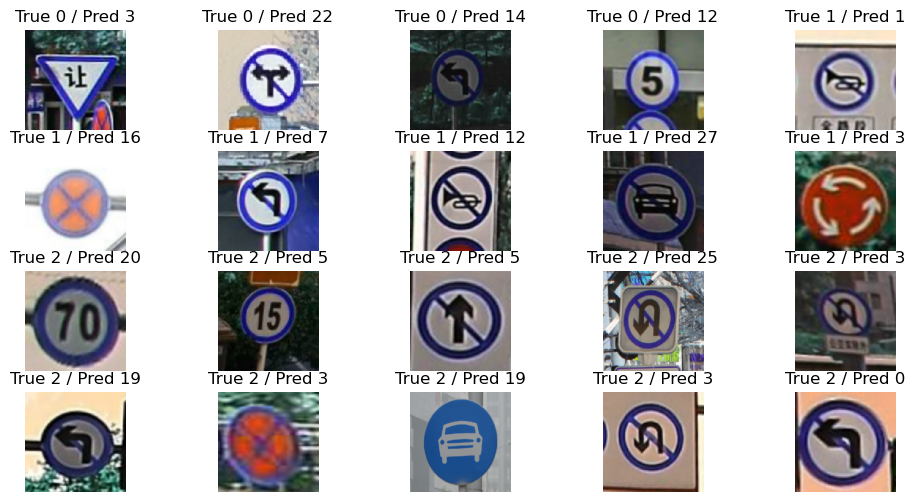

In [78]:
import matplotlib.pyplot as plt

# Get 10 images from test_gen
batch_images, batch_labels = next(test_gen)  # Get one batch of images & labels

plt.figure(figsize=(12, 6))
for i in range(min(20, len(batch_images))):  # Handle cases with <10 images
    plt.subplot(4, 5, i + 1)
    
    img = batch_images[i]  # Select image
    plt.imshow(img)  # Show image
    plt.title(f"True {y_true[i]} / Pred {y_pred[i]}")  
    plt.axis("off")

plt.show()
